In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_moons

from scipy.sparse import csgraph

https://medium.com/@tomernahshon/spectral-clustering-from-scratch-38c68968eae0

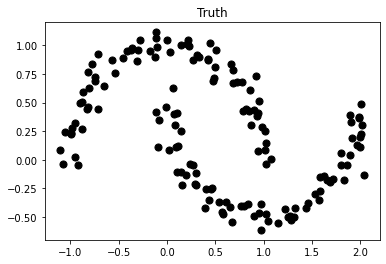

In [5]:
random_state = 21
X, value = make_moons(150, noise=.07, random_state=random_state)
fig, ax = plt.subplots()
ax.set_title('Truth')
ax.scatter(X[:, 0], X[:, 1],c='k',s=50)

In [6]:
A = radius_neighbors_graph(X, 0.4, mode='distance')
G = csgraph.laplacian(A, normed=False)

In [ ]:
radius_neighbors_graph(np.array([[0,0],[1,1],[1,2]]), radius=2, mode='distance').toarray()

In [10]:
G.toarray()[0,:]

array([ 3.8892734 ,  0.        ,  0.        ,  0.        , -0.23955829,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.09982062,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.2648146 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.05354022,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.27996014,  0.        ,  0.        , -0.28635411,
        0.        ,  0.        ,  0.        , -0.32741014,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.12819781,
       -0.09730447,  0.        ,  0.        ,  0.        ,  0.  

In [11]:
eigval, eigvec = np.linalg.eig(G.toarray())

In [12]:
I = np.argsort(np.abs(eigval))
print(eigval[I[0]])
print(eigval[I[1]])
print(eigval[I[2]])

8.153200337090993e-16
0.030989728758729875
0.1263096575321939


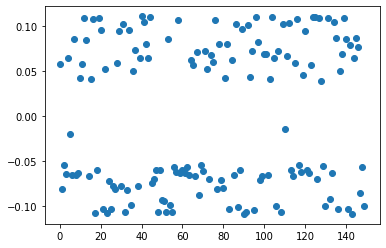

In [13]:
v = eigvec[:,I[1]]
plt.plot(v, 'o')

In [14]:
POS = np.where(v >= 0)[0]
NEG = np.where(v < 0)[0]
test = np.zeros_like(value)
test[POS] = 1

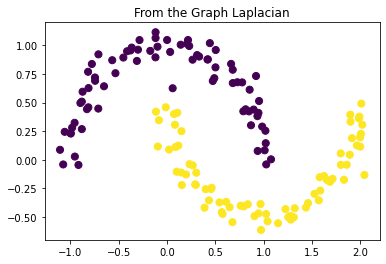

In [15]:
fig, ax = plt.subplots()
ax.set_title('From the Graph Laplacian')
ax.scatter(X[:, 0], X[:, 1],c=test,s=50)